### Actividad 1: Correlación 

In [1]:
#Carguemos nuestras librerías
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Cargamos nuestra base de datos 
diamond=pd.read_csv('diamonds.csv')
print(diamond.head(5))

   carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0  326.0  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75   

      volume  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250  


### Identificación de nulos

In [3]:
#Hacemos una inspección para identificar valores nulos 
vna=diamond.isnull().sum()
vna

carat      3
cut        0
color      0
clarity    0
depth      2
table      3
price      3
x          1
y          1
z          4
volume     0
dtype: int64

#### Tratamiento de nulos 

In [ ]:
#Columna carat 
diamond["carat"]=diamond["carat"].fillna(diamond["carat"].mean())
#Comprobamos los cambios 
vna=diamond.isnull().sum()
vna
#Columna depth 
diamond["depth"]=diamond["depth"].fillna(diamond["depth"].mean())
vna=diamond.isnull().sum()
vna
#Columna table 
diamond["table"]=diamond["table"].fillna(diamond["table"].mean())
vna=diamond.isnull().sum()
vna
#Columna price 
diamond["price"]=diamond["price"].fillna(diamond["price"].mean())
#diamond["price"]= diamond["price"].fillna("mean")
vna=diamond.isnull().sum()
vna
#Columna x 
diamond["x"]=diamond["x"].fillna(diamond["x"].median())
vna=diamond.isnull().sum()
vna
#Columna y 
diamond["y"]=diamond["y"].fillna(diamond["y"].median())
vna=diamond.isnull().sum()
vna
#Columna z 
diamond["z"]=diamond["z"].fillna(diamond["z"].median())
#Comprobamos que se hayan sustituido los valores de manera adecuada 
vna=diamond.isnull().sum()
vna

#### Construcción de modelos de regresión lineal 

#### Carat 

<AxesSubplot:xlabel='carat', ylabel='price'>

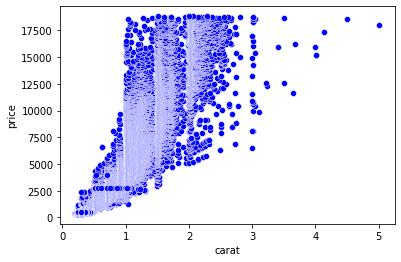

In [5]:
#Hacemos un gráfico de dispersión para price y carat
from turtle import color
sns.scatterplot(x='carat', y='price', color="blue", data=diamond)

In [6]:
#Declaramos las varianbles dependientes e independientes 
v_indp= diamond[['carat']]
v_dep= diamond['price']

In [7]:
#Definimos a model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()
type(model)

sklearn.linear_model._base.LinearRegression

In [8]:
#Realizamos el ajuste del modelo
model.fit(X=v_indp, y=v_dep)

LinearRegression()

In [9]:
#Obtenemos los valores de los coeficientes y el intercepto 
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([7756.35420506]),
 'rank_': 1,
 'singular_': array([110.08706606]),
 'intercept_': -2256.1579429364906}

In [10]:
#Comprobamos el coeficiente de correlación 
model.score(X=v_indp, y=v_dep)
#Coeficiente de determinación 
0.84*0.84
#0.705

0.7055999999999999

#### Modelo predictivo carat

In [54]:
#Predecimos el precio del diamante a partir de la variable carat 
y_pred= model.predict(X=diamond[['carat']])
y_pred

array([-472.19647577, -627.32355987, -472.19647577, ..., 3173.29000061,
       4414.30667342, 3561.10771086])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
diamond.insert(0, 'Predicciones_c', y_pred)
diamond

<AxesSubplot:xlabel='carat', ylabel='price'>

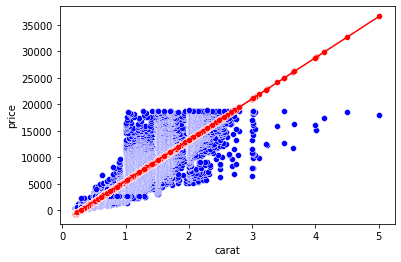

In [59]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='carat', y='price', color="blue", data=diamond)
sns.scatterplot(x='carat', y='Predicciones_c', color="red", data=diamond)
sns.lineplot(x='carat', y='Predicciones_c', color="red", data=diamond)

#### Depth 

<AxesSubplot:xlabel='depth', ylabel='price'>

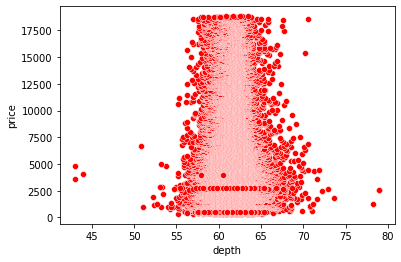

In [11]:
#Hacemos un gráfico de dispersión para price y depth
from turtle import color
sns.scatterplot(x='depth', y='price', color="red", data=diamond)

In [12]:
#Declaramos las varianbles dependientes e independientes 
vd_indp= diamond[['depth']]
v_dep= diamond['price']

In [13]:
#Definimos a model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model1= LinearRegression()
type(model1)

sklearn.linear_model._base.LinearRegression

In [14]:
#Realizamos el ajuste del modelo
model1.fit(X=vd_indp, y=v_dep)

LinearRegression()

In [15]:
#Obtenemos los valores de los coeficientes y el intercepto 
model1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-29.73235882]),
 'rank_': 1,
 'singular_': array([332.71983003]),
 'intercept_': 5768.836400080321}

In [16]:
#Comprobamos el coeficiente de correlación 
model1.score(X=vd_indp, y=v_dep)
#Coeficiente de determinación 
0.0001*0.0001
#1e-08

1e-08

#### Modelo predictivo depth

In [60]:
#Predecimos el precio del diamante a partir de la variable depth
y_pred1= model1.predict(X=diamond[['depth']])
y_pred1

array([3940.2963328 , 3990.84134279, 4077.06518336, ..., 3901.64426634,
       3932.88121327, 3919.48368163])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
diamond.insert(0, 'Predicciones_d', y_pred1)
diamond

<AxesSubplot:xlabel='depth', ylabel='price'>

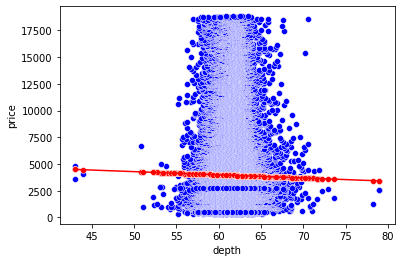

In [62]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='depth', y='price', color="blue", data=diamond)
sns.scatterplot(x='depth', y='Predicciones_d', color="red", data=diamond)
sns.lineplot(x='depth', y='Predicciones_d', color="red", data=diamond)

#### Table 

<AxesSubplot:xlabel='table', ylabel='price'>

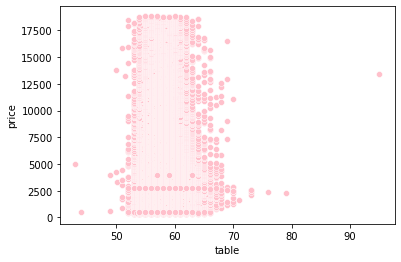

In [17]:
#Hacemos un gráfico de dispersión para price y table
from turtle import color
sns.scatterplot(x='table', y='price', color="pink", data=diamond)

In [18]:
#Declaramos las variables dependientes e independientes 
vt_indp= diamond[['table']]
v_dep= diamond['price']

In [19]:
#Definimos a model2 como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model2= LinearRegression()
type(model2)

sklearn.linear_model._base.LinearRegression

In [20]:
#Realizamos el ajuste del modelo
model2.fit(X=vt_indp, y=v_dep)

LinearRegression()

In [21]:
#Obtenemos los valores de los coeficientes y el intercepto 
model2.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['table'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([227.03808062]),
 'rank_': 1,
 'singular_': array([518.94147621]),
 'intercept_': -9112.105940520949}

In [22]:
#Comprobamos el coeficiente de correlación 
model2.score(X=vt_indp, y=v_dep)
#Coeficiente de determinación 
0.016*0.016

0.000256

#### Modelo predictivo table

In [63]:
#Predecimos el precio del diamante a partir de la variable table
y_pred2= model2.predict(X=diamond[['table']])
y_pred2

array([3374.98849379, 4737.21697753, 5645.36930002, ..., 4510.1788969 ,
       4056.10273566, 3374.98849379])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
diamond.insert(0, 'Predicciones_t', y_pred2)
diamond

<AxesSubplot:xlabel='table', ylabel='price'>

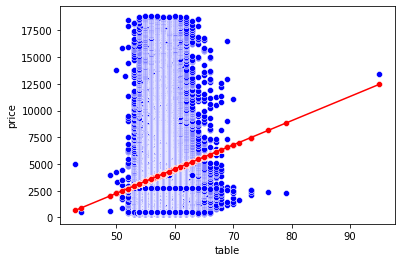

In [65]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='table', y='price', color="blue", data=diamond)
sns.scatterplot(x='table', y='Predicciones_t', color="red", data=diamond)
sns.lineplot(x='table', y='Predicciones_t', color="red", data=diamond)

#### Carat y depth 

In [23]:
#Declaramos las variables dependientes e independientes
Vars_Indep= diamond[['carat', 'depth']]
v_dep= diamond['price']

In [24]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model3= LinearRegression()

In [25]:
#Realizamos el ajuste del modelo
model3.fit(Vars_Indep, y=v_dep)

LinearRegression()

In [26]:
#Obtenemos los valores de los coeficientes y el intercepto 
model3.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'depth'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([7765.07833944, -102.25746658]),
 'rank_': 2,
 'singular_': array([332.73612409, 110.03780776]),
 'intercept_': 4051.217552744089}

In [27]:
#Comprobamos el coeficiente de correlación 
model3.score(X=Vars_Indep, y=v_dep)
#Coeficiente de determinación 
0.85*0.85

0.7224999999999999

#### Modelo predictivo carat y depth

In [66]:
#Predecimos el precio del diamante a partir de la variable table
y_pred3= model3.predict(X=diamond[['carat', 'depth']])
y_pred3

array([-451.64862381, -433.11249741,   18.73572246, ..., 3065.00348918,
       4414.84816757, 3514.6118861 ])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
diamond.insert(0, 'Predicciones_cd', y_pred3)
diamond

#### Carat y table 

In [28]:
#Declaramos las variables dependientes e independientes
Vars1_Indep= diamond[['carat', 'table']]
v_dep= diamond['price']

In [29]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model4= LinearRegression()

In [30]:
#Realizamos el ajuste del modelo
model4.fit(Vars1_Indep, y=v_dep)

LinearRegression()

In [31]:
#Obtenemos los valores de los coeficientes y el intercepto 
model4.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['carat', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([7819.95800874,  -74.28360202]),
 'rank_': 2,
 'singular_': array([519.34406744, 108.17188849]),
 'intercept_': 1961.2231836084225}

In [32]:
#Comprobamos el coeficiente de correlación 
model4.score(X=Vars1_Indep, y=v_dep)
#Coeficiente de determinación 
0.85*0.85

0.7224999999999999

#### Depth y table

In [33]:
#Declaramos las variables dependientes e independientes
Vars2_Indep= diamond[['depth', 'table']]
v_dep= diamond['price']

In [34]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model5= LinearRegression()

In [35]:
#Realizamos el ajuste del modelo
model5.fit(Vars2_Indep, y=v_dep)

LinearRegression()

In [36]:
#Obtenemos los valores de los coeficientes y el intercepto 
model5.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['depth', 'table'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 82.19572083, 242.62543939]),
 'rank_': 2,
 'singular_': array([533.21856737, 309.32297107]),
 'intercept_': -15083.249025284556}

In [37]:
#Comprobamos el coeficiente de correlación 
model5.score(X=Vars2_Indep, y=v_dep)
#Coeficiente de determinación 
0.016*0.016

0.000256

#### Tamaño 

In [39]:
#Para este modelo calcularemos el volumen a partir de x, y, z
#Declaramos las variables dependientes e independientes 
vm3_indp= diamond[['volume']]
v_dep= diamond['price']

In [40]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model6= LinearRegression()

In [ ]:
#Realizamos el ajuste del modelo
model6.fit(vm3_indp, y=v_dep)
#Obtenemos los valores de los coeficientes y el intercepto 
model6.__dict__

In [43]:
#Comprobamos el coeficiente de correlación 
model6.score(X=vm3_indp, y=v_dep)
#0.814
#Obtenemos el coeficiente de determinación
0.814*0.814
#0.662

0.662596

#### Tamaño, carat y depth 

In [44]:
#Declaramos las variables dependientes e independientes para nuestra regresión lineal múltiple
v_indepm= diamond[['carat', 'depth','volume']]
v_dep= diamond['price']

In [45]:
#Se define model como la función de regresión lineal múltiple
from sklearn.linear_model import LinearRegression
model7= LinearRegression()

In [ ]:
#Realizamos el ajuste del modelo
model7.fit(v_indepm, y=v_dep)
#Obtenemos los valores de los coeficientes y el intercepto 
model7.__dict__

In [48]:
#Comprobamos el coeficiente de correlación 
model7.score(X=v_indepm, y=v_dep)
#0.8507
#Obtenemos el coeficiente de determinación
0.8507*0.8507
#0.7236

0.7236904900000001

#### Tamaño, carat, depth y table 

In [49]:
#Declaramos las variables dependientes e independientes para nuestra regresión lineal múltiple
v_indepm1= diamond[['carat', 'depth','volume','table']]
v_dep= diamond['price']

In [50]:
#Se define model como la función de regresión lineal múltiple
from sklearn.linear_model import LinearRegression
model8= LinearRegression()

In [ ]:
#Realizamos el ajuste del modelo
model8.fit(v_indepm1, y=v_dep)
#Obtenemos los valores de los coeficientes y el intercepto 
model8.__dict__

In [53]:
#Comprobamos el coeficiente de correlación 
model8.score(X=v_indepm1, y=v_dep)
#0.85367
#Obtenemos el coeficiente de determinación
0.85367*0.85367
#0.7287

0.7287524689000001